# Mushroom Project

In [34]:
# import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [35]:
df= pd.read_csv(r"C:\Users\admin\Desktop\mushrooms.csv")

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## EDA

In [36]:
df.shape

(8124, 23)

We have 8124 rows and 23 columns in dataset

In [37]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Here all data in classes or variable

In [38]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no any missing values in dataset

In [39]:
df['class'].unique()

array(['p', 'e'], dtype=object)

There are 2 unique value in df['class']

In [40]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

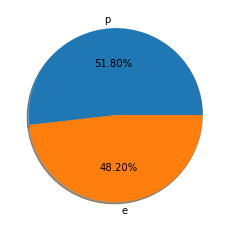

In [41]:
# pie chart for class variable

labels = 'p','e'

fig,ax = plt.subplots()
ax.pie(df['class'].value_counts(),labels=labels, autopct='%1.2f%%',shadow=True)

plt.show()

In [42]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### Univariate analysis

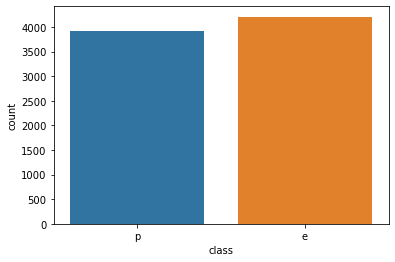

In [43]:
sns.countplot(df['class']);

All 2 classes are equally distributed,there is no class imbalance issue exists.

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
    df[column]=le.fit_transform(df[column])
    df[column].describe()
    

In [45]:
lab_enc = LabelEncoder()

In [46]:
df2 = lab_enc.fit_transform(df['class'])
pd.Series(df2)

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Length: 8124, dtype: int64

In [47]:
df['class'] = df2
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [58]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [59]:
x=df.drop('class',axis=1)
y=df['class']

In [49]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

### Using SelectKBest feature Selection method

In [65]:
best_features = SelectKBest(score_func=f_classif, k=17)
fit = best_features.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)


#concatenate dataframes

feature_scores = pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score'] # name outpot columns
print(feature_scores.nlargest(17,'Score')) # print 17 best features


                Feature_Name        Score
7                  gill-size  3343.700439
8                 gill-color  3182.110596
3                    bruises  2729.510254
18                 ring-type  1658.307007
10                stalk-root  1365.373901
6               gill-spacing  1121.971924
11  stalk-surface-above-ring  1023.906250
12  stalk-surface-below-ring   796.237427
20                population   795.558777
21                   habitat   402.052460
17               ring-number   391.206696
1                cap-surface   267.136200
19         spore-print-color   247.489716
13    stalk-color-above-ring   197.297867
14    stalk-color-below-ring   178.710388
16                veil-color   174.766830
5            gill-attachment   137.887238


### Model Building

In [68]:
new_x = df[['gill-color','bruises','ring-type','stalk-root','gill-spacing','stalk-surface-above-ring','stalk-surface-below-ring','habitat','ring-number','cap-surface','spore-print-color','stalk-color-above-ring','stalk-color-below-ring','veil-color','gill-attachment']]

In [69]:
new_x

,gill-color,bruises,ring-type,stalk-root,gill-spacing,stalk-surface-above-ring,stalk-surface-below-ring,habitat,ring-number,cap-surface,spore-print-color,stalk-color-above-ring,stalk-color-below-ring,veil-color,gill-attachment
0,4,1,4,3,0,2,2,5,1,2,2,7,7,2,1
1,4,1,4,2,0,2,2,1,1,2,3,7,7,2,1
2,5,1,4,2,0,2,2,3,1,2,3,7,7,2,1
3,5,1,4,3,0,2,2,5,1,3,2,7,7,2,1
4,4,0,0,3,1,2,2,1,1,2,3,7,7,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,11,0,4,0,0,2,2,2,1,2,0,5,5,1,0
8120,11,0,4,0,0,2,2,2,1,2,0,5,5,0,0
8121,5,0,4,0,0,2,2,2,1,2,0,5,5,1,0
8122,0,0,0,0,0,2,1,2,1,3,7,7,7,2,1


In [70]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(new_x)


In [71]:
#Building model to test unexposed data
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.25,random_state = 355)


knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [72]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[1058,    0],
       [   0,  973]], dtype=int64)

In [73]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1058
           1       1.00      1.00      1.00       973

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



Now Get Accuracy is 100%